In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
# import data set 
ht= pd.read_csv('hotel_booking.csv', encoding= 'unicode_escape')

In [3]:
ht.shape

(119390, 36)

In [4]:
# print top five data
ht.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Data cleaning 

In [5]:
#  Now check the null values
pd.isnull(ht).sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
# Drop null values
ht.dropna(inplace=True)

In [7]:
# Drop duplicates 
ht.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,...,Transient,82.0,1,1,Check-Out,2015-10-13,Darryl Phillips,Darryl_Phillips@hotmail.com,731-360-4698,************2677
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,Transient-Party,52.2,0,0,Check-Out,2015-11-17,Lynn Gaines,Lynn.Gaines77@yahoo.com,866-053-4253,************6564
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-06,Richard Diaz,Richard.Diaz@mail.com,836-443-4157,************8259
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,...,Transient-Party,40.0,0,0,Check-Out,2015-11-15,Karen Lynch,KarenLynch@att.com,153-365-6906,************5124
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,Transient-Party,48.0,0,0,Check-Out,2015-11-16,Joseph Livingston,Joseph.L@protonmail.com,175-653-7050,************3824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,...,Transient-Party,150.0,0,1,Check-Out,2017-05-25,Meghan Flores,Flores_Meghan@verizon.com,439-451-4147,************8201
113046,City Hotel,0,13,2017,May,22,29,1,3,1,...,Transient,95.0,0,0,Check-Out,2017-06-02,Jordan Olson,Jordan.O@mail.com,860-873-3107,************9138
113082,City Hotel,0,13,2017,May,22,29,1,3,2,...,Transient,110.0,0,0,Check-Out,2017-06-02,Robert Reynolds,Robert.R@yandex.com,604-257-1344,************8808
113627,City Hotel,0,210,2017,June,23,9,0,1,2,...,Transient,135.0,0,0,Check-Out,2017-06-10,Mrs. Colleen Mcdaniel MD,Mrs._MD@outlook.com,929-209-4199,************4558


In [8]:
#drop unrelated/blank columns
ht.drop(['arrival_date_week_number', 'adr','name','email','phone-number'], axis=1, inplace=True)

In [9]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 2392 to 116451
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           217 non-null    object 
 1   is_canceled                     217 non-null    int64  
 2   lead_time                       217 non-null    int64  
 3   arrival_date_year               217 non-null    int64  
 4   arrival_date_month              217 non-null    object 
 5   arrival_date_day_of_month       217 non-null    int64  
 6   stays_in_weekend_nights         217 non-null    int64  
 7   stays_in_week_nights            217 non-null    int64  
 8   adults                          217 non-null    int64  
 9   children                        217 non-null    float64
 10  babies                          217 non-null    int64  
 11  meal                            217 non-null    object 
 12  country                         217

In [10]:
ht.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,217.000000,217.000000,217.000000,217.000000,217.00000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000
mean,0.078341,40.520737,2015.465438,10.824885,1.56682,4.631336,1.410138,0.036866,0.0,0.069124,0.009217,0.147465,1.285714,202.617512,262.105991,0.0,0.092166,0.198157
std,0.269329,61.748375,0.720053,7.582065,1.49270,3.552846,0.520406,0.232788,0.0,0.254252,0.135769,0.717768,1.251454,111.487444,103.602708,0.0,0.289929,0.546365
min,0.000000,0.000000,2015.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000
25%,0.000000,12.000000,2015.000000,6.000000,0.00000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,185.000000,281.000000,0.0,0.000000,0.000000
50%,0.000000,27.000000,2015.000000,9.000000,2.00000,4.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,185.000000,281.000000,0.0,0.000000,0.000000
75%,0.000000,36.000000,2016.000000,13.000000,2.00000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,324.000000,281.000000,0.0,0.000000,0.000000
max,1.000000,364.000000,2017.000000,31.000000,9.00000,21.000000,3.000000,2.000000,0.0,1.000000,2.000000,7.000000,6.000000,444.000000,499.000000,0.0,1.000000,3.000000


In [11]:
ht.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'credit_card'],
      dtype='object')

# Exploratory Data Analysis

<Axes: xlabel='hotel', ylabel='Count'>

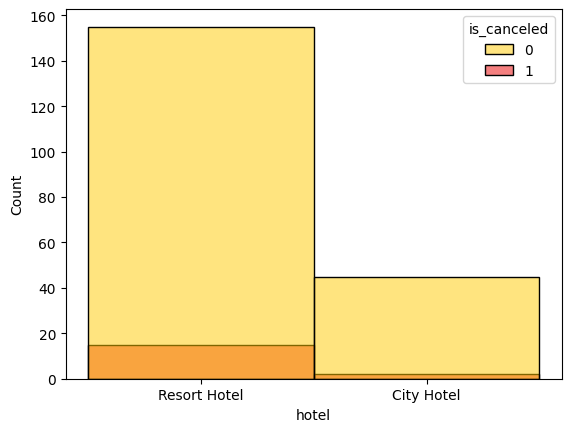

In [12]:
# plotting a histogram for  city hotel and resort hotel 
sns.histplot(data=ht,x='hotel',palette='hot_r',hue= 'is_canceled')


<Axes: xlabel='arrival_date_year', ylabel='Count'>

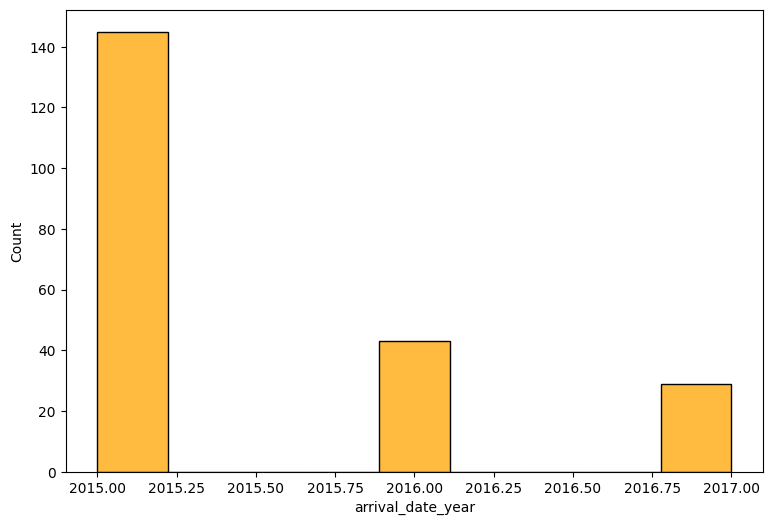

In [13]:
# plotting a histogram for  arrival year
fig1, ax1 = plt.subplots(figsize=(9,6))
sns.histplot(data=ht,x='arrival_date_year',color="orange")

<Axes: xlabel='arrival_date_month', ylabel='count'>

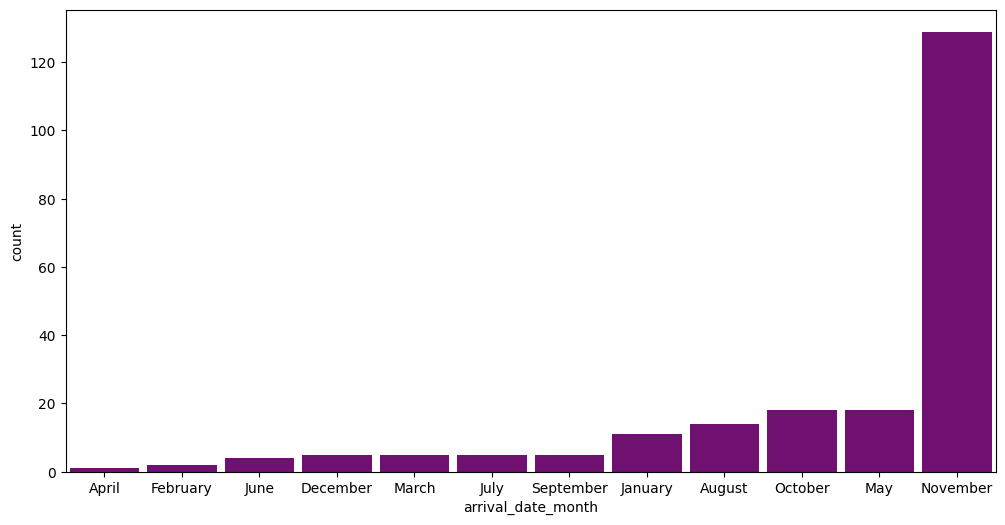

In [14]:
# plotting a histogram for  arrival month

fig2, ax1 = plt.subplots(figsize=(12,6))
sns.countplot(ht, x='arrival_date_month',width=0.9,order=ht['arrival_date_month'].value_counts(ascending=True).index,color="purple")

<Axes: xlabel='lead_time', ylabel='Count'>

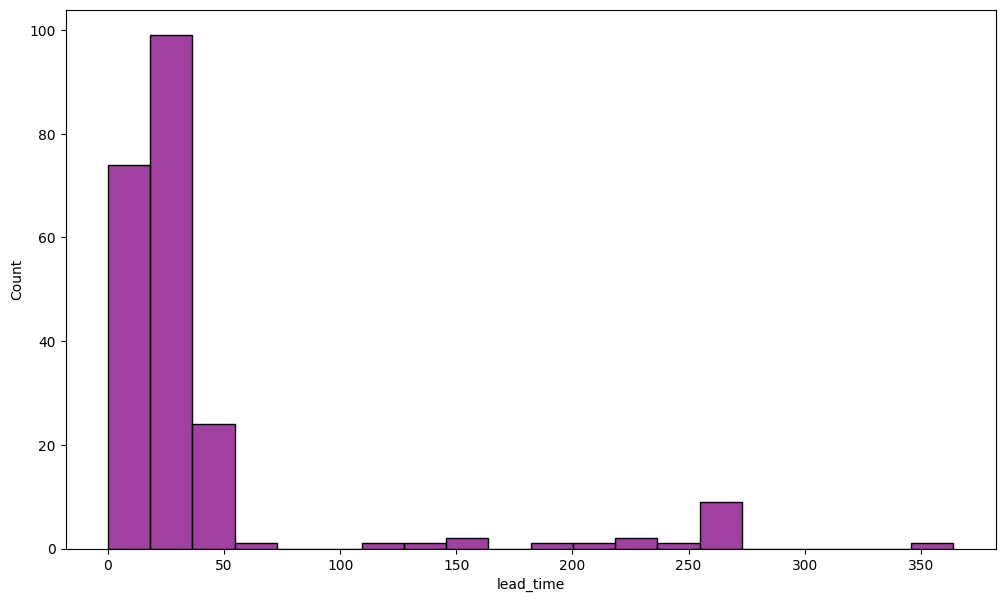

In [15]:
fig3, ax1 = plt.subplots(figsize=(12,7))
sns.histplot(data=ht,x='lead_time',bins=20,color="purple")

<Axes: xlabel='meal', ylabel='count'>

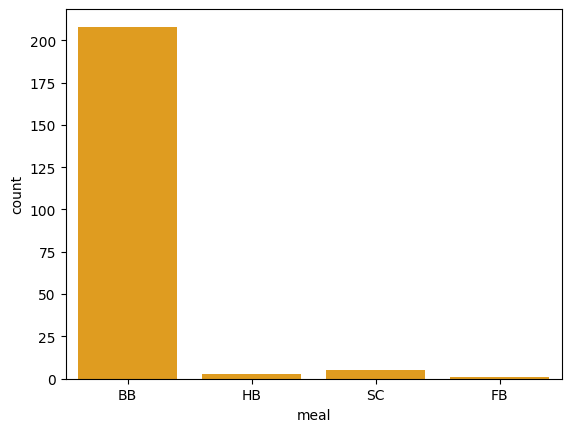

In [68]:
sns.countplot(ht,x= 'meal',color="orange")

In [121]:
print(ht['meal'].unique())

['BB' 'HB' 'SC' 'FB']


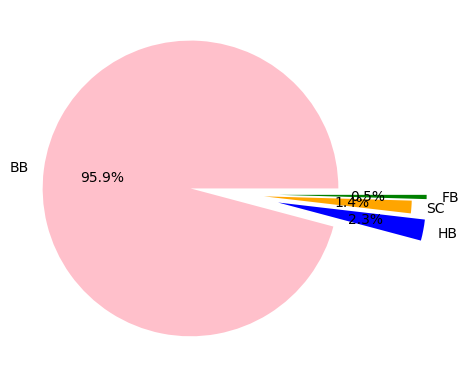

In [131]:
a = ht['meal'].value_counts()
lb=(['BB','HB','SC','FB'])
val=[0.3,0.3,0.2,0.3]
c=['pink','blue','orange','green']
plt.pie(a,labels=lb,explode=val,colors=c,autopct="%0.1f%%")
plt.show()

<Axes: xlabel='country', ylabel='count'>

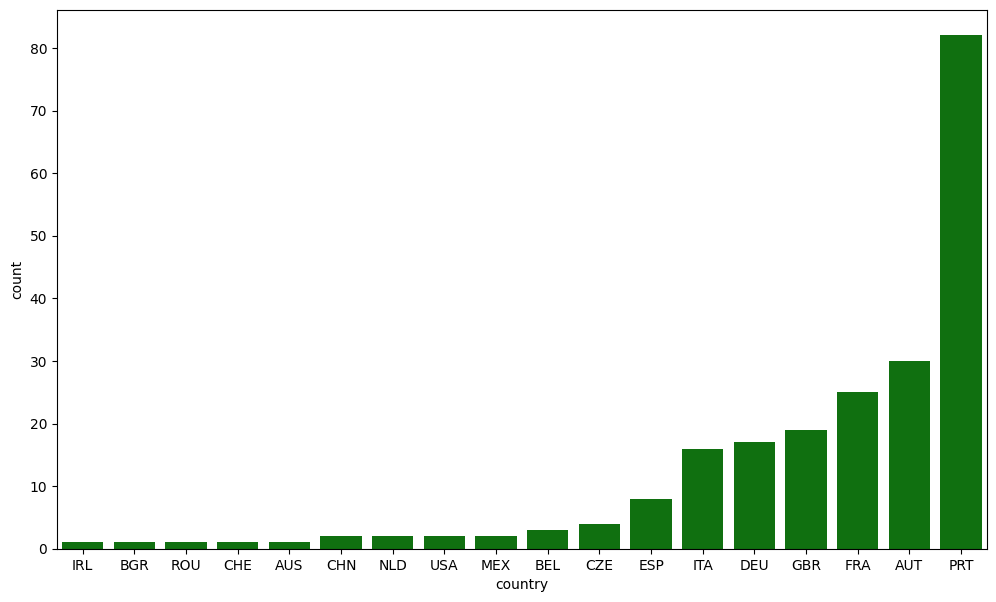

In [17]:
fig3, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(ht,x= 'country',color="green",order=ht['country'].value_counts(ascending=True).index)

In [20]:
ht.columns
print(ht['meal'].unique())

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'credit_card'],
      dtype='object')

In [123]:
print(ht['is_repeated_guest'].unique())

[0 1]


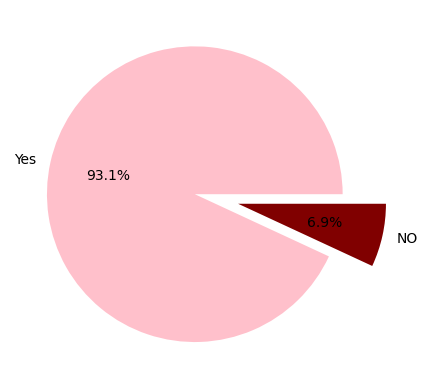

In [126]:
# now we considered 1 is repeated guest and 0 is not repeated guest(0=NO, 1= yes )
a = ht['is_repeated_guest'].value_counts()
lb=(['Yes','NO'])
val=[0.0,0.3]
c=['pink','maroon']
plt.pie(a,labels=lb,colors=c,explode=val,autopct="%0.1f%%")
plt.show()

In [128]:
print(ht['reservation_status'].unique())

['Check-Out' 'Canceled' 'No-Show']


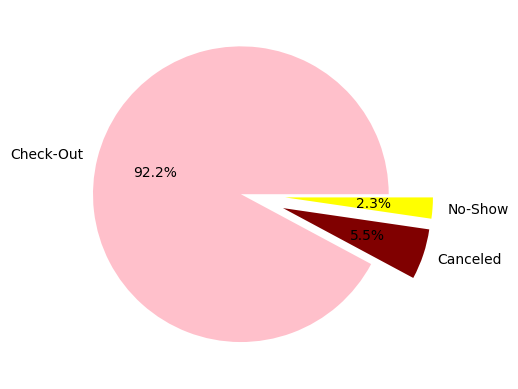

In [129]:
a = ht['reservation_status'].value_counts()
lb=(['Check-Out','Canceled','No-Show'])
val=[0.0,0.3,0.3]
c=['pink','maroon','yellow']
plt.pie(a,labels=lb,colors=c,explode=val,autopct="%0.1f%%")
plt.show()